# MiniProject 1

# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import statistics

## Load in Datasets and Configuring

In [147]:
# cutting out the gender
gender_age = pd.read_csv(r"C:\Users\user\Documents\Data Science\Data sets\gender age.csv", header = 2)
industry = pd.read_csv(r"C:\Users\user\Documents\Data Science\Data sets\industry.csv", header = 1)
age_region = pd.read_csv(r"C:\Users\user\Documents\Data Science\Data sets\age region.csv", header = 2)
gender_region = pd.read_csv(r"C:\Users\user\Documents\Data Science\Data sets\gender region.csv", header = 2)

In [38]:
gender_age.columns.get_loc("Female")

12

In [76]:
gender_age.head()

,Unnamed: 0,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,...,20-24.1,25-29.1,30-34.1,35-39.1,40-44.1,45-49.1,50-54.1,55-59.1,60-64.1,65.1
0,2019M05,54850,119698,145180,129457,114195,103311,108064,98578,91366,...,106805,126424,111783,101152,102430,115738,107972,100339,79980,48640
1,2019M06,53492,117861,143946,129264,114342,103686,108064,98568,91538,...,105566,126066,113056,102429,103423,116721,108945,101198,73070,49319
2,2019M07,54256,117785,143978,130147,114960,104280,108339,98955,91839,...,105404,126472,113640,102815,103181,116506,109182,101408,73252,49159
3,2019M08,52586,117292,143821,130463,115285,104168,108338,98924,91944,...,105331,126413,114492,103675,103746,116903,109486,101659,73659,49430
4,2019M09,53281,117531,144126,131146,115771,104460,108642,99175,92447,...,106035,126938,115407,104678,104276,117303,110023,102068,74187,50584


In [74]:
industry.head()

,Unnamed: 0,"Agriculture, Forestry and Fishing",Mining,Manufacturing,"Electricity, Gas, Water and Waste Services",Construction,Wholesale Trade,Retail Trade,Accommodation and Food Services,"Transport, Postal and Warehousing",Information Media and Telecommunications,Financial and Insurance Services,"Rental, Hiring and Real Estate Services","Professional, Scientific and Technical Services",Administrative and Support Services,Public Administration and Safety,Education and Training,Health Care and Social Assistance,Arts and Recreation Services,Other Services
0,2019M05,96007,5624,232878,19016,171566,112355,204776,146901,93421,32985,62940,34062,169464,111136,133655,197811,234321,40709,71800
1,2019M06,92219,5667,227383,19053,171815,111690,204673,144688,96036,31368,62836,33968,169097,105300,135172,199098,234482,41343,72078
2,2019M07,92710,5790,225474,19217,171966,111124,204796,144510,95614,31232,63008,34127,168465,100245,136117,197483,235259,41667,72182
3,2019M08,93407,5761,227200,19296,171748,110744,204963,145570,92442,32614,63218,33603,168916,100255,134942,199676,234704,41709,72005
4,2019M09,94106,5776,226052,19423,172541,110190,205656,147165,95911,31490,63295,33981,166432,100575,137651,203063,237575,41736,72778


In [75]:
#every 18 columns, location reset with a higher age
age_region.head()

,Unnamed: 0,Northland,Auckland,Waikato,Bay of Plenty,Gisborne,Hawke's Bay,Taranaki,Manawatu-Whanganui,Wellington,...,Manawatu-Whanganui.10,Wellington.10,Tasman.10,Nelson.10,Marlborough.10,West Coast.10,Canterbury.10,Otago.10,Southland.10,Total NZ.10
0,2019M05,4235,33186,11638,8225,1417,4414,2955,5983,11242,...,6158,11242,1326,1096,1481,918,13778,5174,2674,102655
1,2019M06,4064,32410,11379,7917,1365,4297,2912,5885,11229,...,6215,11333,1284,1101,1480,915,13803,5135,2646,103271
2,2019M07,4088,32517,11457,7867,1406,4297,2923,6019,11212,...,6222,11314,1280,1105,1437,890,13701,5065,2559,102837
3,2019M08,4050,32185,11281,7692,1333,4134,2922,5846,11060,...,6258,11346,1285,1095,1473,901,13768,5159,2579,103449
4,2019M09,4100,32404,11520,7758,1315,4208,2958,5942,11188,...,6394,11565,1312,1107,1522,911,14116,5271,2641,105563


In [69]:
gender_region.columns.get_loc("Female")

18

In [78]:
gender_region.head()

,Unnamed: 0,Northland,Auckland,Waikato,Bay of Plenty,Gisborne,Hawke's Bay,Taranaki,Manawatu-Whanganui,Wellington,...,Manawatu-Whanganui.1,Wellington.1,Tasman.1,Nelson.1,Marlborough.1,West Coast.1,Canterbury.1,Otago.1,Southland.1,Total NZ.1
0,2019M05,32579,368717,101098,68147,10624,39061,26323,52340,118241,...,51929,122020,11202,9958,12317,7169,146147,53779,22890,1060195
1,2019M06,32273,369307,102111,66919,10554,37392,26066,52228,119185,...,52140,122845,11089,9912,12281,7076,138019,53504,22405,1057460
2,2019M07,32116,373454,102280,66510,10448,37076,26004,52546,119606,...,52245,123024,11029,9874,12213,7013,138211,53689,21938,1058518
3,2019M08,32038,373624,102349,66235,10377,36651,25908,52155,119425,...,52360,123088,11023,9852,12177,7067,138643,54133,22211,1061972
4,2019M09,32370,375584,103135,66350,10335,36285,26041,52512,119910,...,52838,123845,11154,9926,12332,7135,140061,54560,22660,1069595


In [240]:
#setting up indexs as time series
#naming the column
gender_age.rename(columns = {gender_age.columns[0]:'Date'}, inplace = True)
#getting date column readable for time series
#gender_age["Date"] = gender_age["Date"].str.replace("M", "-")
#converting from string to time series
gender_age['Date'] = pd.to_datetime(gender_age['Date'], format = "%Y-%m")
#setting the time series as the index
gender_age.set_index('Date')

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,...,20-24.1,25-29.1,30-34.1,35-39.1,40-44.1,45-49.1,50-54.1,55-59.1,60-64.1,65.1
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-01,54850,119698,145180,129457,114195,103311,108064,98578,91366,68163,...,106805,126424,111783,101152,102430,115738,107972,100339,79980,48640
2019-06-01,53492,117861,143946,129264,114342,103686,108064,98568,91538,68258,...,105566,126066,113056,102429,103423,116721,108945,101198,73070,49319
2019-07-01,54256,117785,143978,130147,114960,104280,108339,98955,91839,68619,...,105404,126472,113640,102815,103181,116506,109182,101408,73252,49159
2019-08-01,52586,117292,143821,130463,115285,104168,108338,98924,91944,68805,...,105331,126413,114492,103675,103746,116903,109486,101659,73659,49430
2019-09-01,53281,117531,144126,131146,115771,104460,108642,99175,92447,69464,...,106035,126938,115407,104678,104276,117303,110023,102068,74187,50584
2019-10-01,55592,118195,144703,131812,116234,104615,108708,99390,92755,69865,...,106942,127687,116006,104864,104071,117202,110160,102586,74479,50477
2019-11-01,59602,122356,147217,134013,117989,105929,109637,100342,93429,70661,...,110876,129443,117898,106289,105385,118202,111291,103459,75387,51971
2019-12-01,66469,124540,146923,134349,118068,106021,109335,100496,93369,71079,...,113469,128535,117545,105852,104785,117793,111356,103526,75614,52923
2020-01-01,61167,119673,143815,133343,117409,105182,108722,99816,92963,70604,...,107703,125655,115119,103345,101874,114876,108852,101401,73975,48253


In [221]:
#naming the column
industry.rename(columns = {industry.columns[0]:'Date'}, inplace = True)
#getting date column readable for time series
industry["Date"] = industry["Date"].str.replace("M", "-")
#converting from string to time series
industry['Date'] = pd.to_datetime(industry['Date'], format = "%Y-%m")
#setting the time series as the index
industry.set_index('Date')

,"Agriculture, Forestry and Fishing",Mining,Manufacturing,"Electricity, Gas, Water and Waste Services",Construction,Wholesale Trade,Retail Trade,Accommodation and Food Services,"Transport, Postal and Warehousing",Information Media and Telecommunications,Financial and Insurance Services,"Rental, Hiring and Real Estate Services","Professional, Scientific and Technical Services",Administrative and Support Services,Public Administration and Safety,Education and Training,Health Care and Social Assistance,Arts and Recreation Services,Other Services
Date,,,,,,,,,,,,,,,,,,,
2019-05-01,96007,5624,232878,19016,171566,112355,204776,146901,93421,32985,62940,34062,169464,111136,133655,197811,234321,40709,71800
2019-06-01,92219,5667,227383,19053,171815,111690,204673,144688,96036,31368,62836,33968,169097,105300,135172,199098,234482,41343,72078
2019-07-01,92710,5790,225474,19217,171966,111124,204796,144510,95614,31232,63008,34127,168465,100245,136117,197483,235259,41667,72182
2019-08-01,93407,5761,227200,19296,171748,110744,204963,145570,92442,32614,63218,33603,168916,100255,134942,199676,234704,41709,72005
2019-09-01,94106,5776,226052,19423,172541,110190,205656,147165,95911,31490,63295,33981,166432,100575,137651,203063,237575,41736,72778
2019-10-01,97250,5625,230193,19492,173868,111962,208170,148988,93824,32515,61343,34877,167921,100381,137217,199519,238729,42295,72672
2019-11-01,105864,5620,235073,19659,175956,114064,212947,153210,95223,32243,61453,35647,170455,103510,138621,201389,240725,43048,73553
2019-12-01,112040,5614,238109,19760,176266,114675,219592,154641,95558,32076,61617,36188,171211,103044,139939,201978,240770,43763,73853
2020-01-01,108667,5695,234708,19785,172636,112848,212380,149894,94021,31812,61470,35494,168783,98014,139033,188320,236795,41787,72007


In [241]:
#naming the column
age_region.rename(columns = {age_region.columns[0]:'Date'}, inplace = True)
#getting date column readable for time series
#age_region["Date"] = age_region["Date"].str.replace("M", "-")
#converting from string to time series
age_region['Date'] = pd.to_datetime(age_region['Date'], format = "%Y-%m")
#setting the time series as the index
age_region.set_index('Date')

,Northland,Auckland,Waikato,Bay of Plenty,Gisborne,Hawke's Bay,Taranaki,Manawatu-Whanganui,Wellington,Tasman,...,Manawatu-Whanganui.10,Wellington.10,Tasman.10,Nelson.10,Marlborough.10,West Coast.10,Canterbury.10,Otago.10,Southland.10,TotalNZ_65plus
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-01,4235,33186,11638,8225,1417,4414,2955,5983,11242,1534,...,6158,11242,1326,1096,1481,918,13778,5174,2674,102655
2019-06-01,4064,32410,11379,7917,1365,4297,2912,5885,11229,1477,...,6215,11333,1284,1101,1480,915,13803,5135,2646,103271
2019-07-01,4088,32517,11457,7867,1406,4297,2923,6019,11212,1508,...,6222,11314,1280,1105,1437,890,13701,5065,2559,102837
2019-08-01,4050,32185,11281,7692,1333,4134,2922,5846,11060,1456,...,6258,11346,1285,1095,1473,901,13768,5159,2579,103449
2019-09-01,4100,32404,11520,7758,1315,4208,2958,5942,11188,1477,...,6394,11565,1312,1107,1522,911,14116,5271,2641,105563
2019-10-01,4284,33495,12082,8050,1485,4338,3090,6146,11516,1559,...,6358,11591,1303,1103,1527,935,14229,5357,2641,105788
2019-11-01,4709,36229,12904,8754,1581,4738,3340,6576,12214,1744,...,6567,11800,1403,1147,1587,951,14570,5639,2745,108787
2019-12-01,5299,40418,14324,9633,1911,5812,3569,7309,13176,2043,...,6578,11953,1407,1152,1612,977,14771,5680,2807,109844
2020-01-01,5020,35671,13266,9040,1797,5301,3345,6749,11898,1958,...,6054,11165,1286,1079,1516,911,13669,5214,2600,102287


In [223]:
#naming the column
gender_region.rename(columns ={gender_region.columns[0]:'Date'}, inplace = True)
#getting date column readable for time series
gender_region["Date"] = gender_region["Date"].str.replace("M", "-")
#converting from string to time series
gender_region['Date'] = pd.to_datetime(gender_region['Date'], format = "%Y-%m")
#setting the time series as the index
gender_region.set_index('Date')

,Northland,Auckland,Waikato,Bay of Plenty,Gisborne,Hawke's Bay,Taranaki,Manawatu-Whanganui,Wellington,Tasman,...,Manawatu-Whanganui.1,Wellington.1,Tasman.1,Nelson.1,Marlborough.1,West Coast.1,Canterbury.1,Otago.1,Southland.1,Total NZ.1
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-01,32579,368717,101098,68147,10624,39061,26323,52340,118241,11799,...,51929,122020,11202,9958,12317,7169,146147,53779,22890,1060195
2019-06-01,32273,369307,102111,66919,10554,37392,26066,52228,119185,11428,...,52140,122845,11089,9912,12281,7076,138019,53504,22405,1057460
2019-07-01,32116,373454,102280,66510,10448,37076,26004,52546,119606,11488,...,52245,123024,11029,9874,12213,7013,138211,53689,21938,1058518
2019-08-01,32038,373624,102349,66235,10377,36651,25908,52155,119425,11385,...,52360,123088,11023,9852,12177,7067,138643,54133,22211,1061972
2019-09-01,32370,375584,103135,66350,10335,36285,26041,52512,119910,11194,...,52838,123845,11154,9926,12332,7135,140061,54560,22660,1069595
2019-10-01,32617,377988,104285,66222,10571,36276,26155,53044,120535,11062,...,53087,124375,11330,9898,12351,7255,140544,54540,22769,1074645
2019-11-01,33471,383297,105856,67760,10776,38334,26825,53907,121670,11628,...,53932,125781,11680,10157,12759,7403,143023,55769,23357,1095267
2019-12-01,33725,384872,106818,68291,11026,40205,26979,54469,122259,12011,...,54311,126268,11878,10313,12944,7534,144124,56171,23747,1103292
2020-01-01,32916,376234,105084,67222,10889,39432,26548,53552,120179,11860,...,52561,122254,11456,9957,12575,7262,138548,54413,23153,1066680


In [133]:
#all 4 datasets contain no null values
industry.isnull().sum()

Date                                               0
Agriculture, Forestry and Fishing                  0
Mining                                             0
Manufacturing                                      0
Electricity, Gas, Water and Waste Services         0
Construction                                       0
Wholesale Trade                                    0
Retail Trade                                       0
Accommodation and Food Services                    0
Transport, Postal and Warehousing                  0
Information Media and Telecommunications           0
Financial and Insurance Services                   0
Rental, Hiring and Real Estate Services            0
Professional, Scientific and Technical Services    0
Administrative and Support Services                0
Public Administration and Safety                   0
Education and Training                             0
Health Care and Social Assistance                  0
Arts and Recreation Services                  

In [135]:
gender_region.describe()

,Northland,Auckland,Waikato,Bay of Plenty,Gisborne,Hawke's Bay,Taranaki,Manawatu-Whanganui,Wellington,Tasman,...,Manawatu-Whanganui.1,Wellington.1,Tasman.1,Nelson.1,Marlborough.1,West Coast.1,Canterbury.1,Otago.1,Southland.1,Total NZ.1
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,33577.333333,381972.027778,107254.194444,68775.138889,11098.361111,39867.416667,26888.500000,54255.333333,122711.361111,12203.694444,...,53922.944444,126123.222222,11706.166667,10047.416667,12568.666667,7227.916667,142326.777778,54706.611111,23128.083333,1.091389e+06
std,1024.875184,6628.565191,3296.128559,1825.929464,423.657891,1695.512066,621.999472,1303.936633,2501.650154,499.109368,...,1307.032450,2552.632637,377.019628,168.810016,223.351357,135.191372,3157.938470,897.833051,574.225211,2.450870e+04
min,32038.000000,368717.000000,101098.000000,66222.000000,10335.000000,36276.000000,25908.000000,52155.000000,118241.000000,11062.000000,...,51929.000000,122020.000000,11023.000000,9802.000000,12177.000000,7007.000000,138019.000000,53338.000000,21938.000000,1.057460e+06
25%,32641.750000,377717.750000,105168.000000,67188.250000,10769.500000,38955.500000,26325.250000,53169.000000,121074.500000,12002.000000,...,52769.250000,124026.500000,11425.250000,9898.750000,12396.000000,7133.750000,139671.750000,53889.250000,22697.500000,1.069324e+06
50%,33517.000000,381806.500000,106873.000000,68219.000000,11175.000000,40104.500000,26886.500000,54374.000000,122277.000000,12292.500000,...,54102.500000,126105.000000,11747.000000,10031.000000,12561.500000,7221.500000,141724.000000,54550.000000,23214.000000,1.088583e+06
75%,34230.750000,385408.750000,109358.500000,70388.000000,11470.250000,41050.750000,27259.500000,55067.750000,124331.500000,12445.000000,...,54908.500000,128308.250000,11969.250000,10168.250000,12680.750000,7319.250000,144584.000000,55460.250000,23533.000000,1.108353e+06
max,35731.000000,396634.000000,113472.000000,72988.000000,11824.000000,42935.000000,28165.000000,56932.000000,127765.000000,13307.000000,...,56772.000000,131504.000000,12513.000000,10434.000000,13122.000000,7534.000000,149541.000000,56824.000000,24390.000000,1.146505e+06


In [134]:
industry.describe()

,"Agriculture, Forestry and Fishing",Mining,Manufacturing,"Electricity, Gas, Water and Waste Services",Construction,Wholesale Trade,Retail Trade,Accommodation and Food Services,"Transport, Postal and Warehousing",Information Media and Telecommunications,Financial and Insurance Services,"Rental, Hiring and Real Estate Services","Professional, Scientific and Technical Services",Administrative and Support Services,Public Administration and Safety,Education and Training,Health Care and Social Assistance,Arts and Recreation Services,Other Services
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,102362.833333,5520.194444,231796.833333,20484.472222,184705.361111,112386.333333,210496.694444,146954.944444,90593.194444,31390.750000,64234.750000,35491.250000,175007.027778,101868.194444,144913.194444,199081.055556,247542.666667,40590.194444,75275.194444
std,6182.847779,147.424328,3817.923426,833.782414,9868.117256,1724.541347,5456.733763,3541.320060,3167.692561,901.285411,2152.570429,1056.365991,7337.895928,4471.816491,6593.132760,4220.700233,9109.247901,1513.801323,2516.029784
min,92219.000000,5288.000000,224521.000000,19016.000000,171566.000000,109485.000000,204673.000000,140432.000000,84823.000000,29864.000000,61343.000000,33603.000000,166432.000000,91913.000000,133655.000000,188320.000000,234321.000000,37543.000000,71800.000000
25%,98074.000000,5409.250000,229519.750000,19778.750000,176426.500000,111065.500000,206848.500000,144492.500000,88019.250000,30723.000000,62679.750000,34553.500000,169198.000000,98819.500000,139932.250000,197453.750000,240127.000000,39678.000000,73461.000000
50%,101561.000000,5512.500000,232024.500000,20492.000000,182055.500000,112266.000000,208634.500000,146655.500000,90093.500000,31305.000000,63812.000000,35570.500000,171462.500000,101168.000000,145521.500000,199617.500000,245752.500000,40654.000000,74434.000000
75%,106409.500000,5621.000000,234799.250000,21067.500000,192586.500000,113483.250000,213067.750000,150030.250000,93521.750000,31758.750000,65853.500000,36268.500000,180626.750000,105334.500000,149348.500000,202122.250000,255943.000000,41746.000000,77625.000000
max,116468.000000,5820.000000,238132.000000,22173.000000,201499.000000,116116.000000,227725.000000,154641.000000,96036.000000,34582.000000,68929.000000,37450.000000,190573.000000,111779.000000,163213.000000,205329.000000,261388.000000,43763.000000,79834.000000


In [136]:
age_region.describe()

,Northland,Auckland,Waikato,Bay of Plenty,Gisborne,Hawke's Bay,Taranaki,Manawatu-Whanganui,Wellington,Tasman,...,Manawatu-Whanganui.10,Wellington.10,Tasman.10,Nelson.10,Marlborough.10,West Coast.10,Canterbury.10,Otago.10,Southland.10,Total NZ.10
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,4613.222222,34252.583333,12620.416667,8540.027778,1620.916667,4855.027778,3220.972222,6533.194444,11818.722222,1699.138889,...,6457.944444,11904.583333,1367.222222,1100.361111,1544.000000,947.777778,14279.305556,5401.666667,2713.833333,108353.527778
std,540.509342,3735.941384,1314.071891,911.150904,210.085748,694.312753,338.548961,588.186648,1080.456877,208.814635,...,209.683564,422.894744,65.074512,31.452597,65.727576,36.442605,437.826895,185.075274,96.390426,3842.999115
min,3875.000000,28266.000000,10932.000000,7210.000000,1315.000000,3903.000000,2749.000000,5814.000000,10352.000000,1439.000000,...,6054.000000,11165.000000,1255.000000,1027.000000,1437.000000,883.000000,13349.000000,5065.000000,2559.000000,102086.000000
25%,4097.000000,31997.750000,11504.250000,7841.750000,1406.000000,4297.000000,2926.000000,5972.750000,11202.250000,1507.750000,...,6317.750000,11586.750000,1321.750000,1078.750000,1480.750000,919.500000,13938.250000,5252.750000,2641.000000,105731.750000
50%,4576.000000,33250.500000,12408.000000,8420.000000,1610.500000,4769.500000,3202.500000,6497.500000,11496.000000,1662.500000,...,6458.000000,11930.000000,1366.000000,1095.500000,1545.500000,944.000000,14288.000000,5420.000000,2719.000000,108813.000000
75%,4989.250000,35932.000000,13297.250000,9055.000000,1783.500000,5229.750000,3396.750000,6808.000000,12286.750000,1863.750000,...,6615.250000,12224.500000,1404.000000,1118.750000,1583.250000,969.500000,14580.750000,5521.000000,2773.000000,110687.500000
max,5994.000000,44805.000000,16107.000000,10933.000000,2101.000000,6573.000000,4063.000000,8080.000000,14986.000000,2200.000000,...,6838.000000,12650.000000,1514.000000,1160.000000,1677.000000,1022.000000,15158.000000,5756.000000,2906.000000,115546.000000


In [198]:
age_region.iloc[0][1]

4235

In [174]:
len(age_region.columns)

188

<BarContainer object of 16 artists>

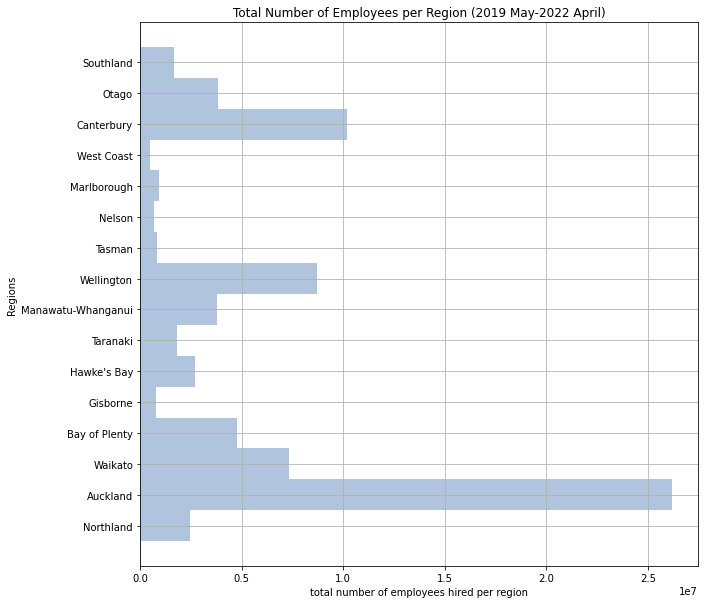

In [399]:
nor = age_region.iloc[:, 1: 188: 17]
auc = age_region.iloc[:, 2: 188: 17]
wai = age_region.iloc[:, 3: 188: 17]
bay = age_region.iloc[:, 4: 188: 17]
gis = age_region.iloc[:, 5: 188: 17]
haw = age_region.iloc[:, 6: 188: 17]
tar = age_region.iloc[:, 7: 188: 17]
man = age_region.iloc[:, 8: 188: 17]
wel = age_region.iloc[:, 9: 188: 17]
tas = age_region.iloc[:, 10: 188: 17]
nel = age_region.iloc[:, 11: 188: 17]
mar = age_region.iloc[:, 12: 188: 17]
wes = age_region.iloc[:, 13: 188: 17]
can = age_region.iloc[:, 14: 188: 17]
ota = age_region.iloc[:, 15: 188: 17]
sou = age_region.iloc[:, 16: 188:17]

loca = [nor, auc, wai, bay, gis, haw, tar, man, wel, tas, nel, mar, wes, can, ota ,sou]
totre = [0]
totreg = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(loca)):
    locas = (loca[i][1:36])
    for k in range(11):
        totre = locas.iloc[:, k]
        for j in range(35):
            totreg[i] += int(totre[j+1])
                

plt.rcParams["figure.figsize"] = (10,10)
plt.grid()
plt.xlabel("total number of employees hired per region")
plt.ylabel("Regions")
plt.title("Total Number of Employees per Region (2019 May-2022 April)")
plt.barh(location, totreg, height=1, color = "lightsteelblue")

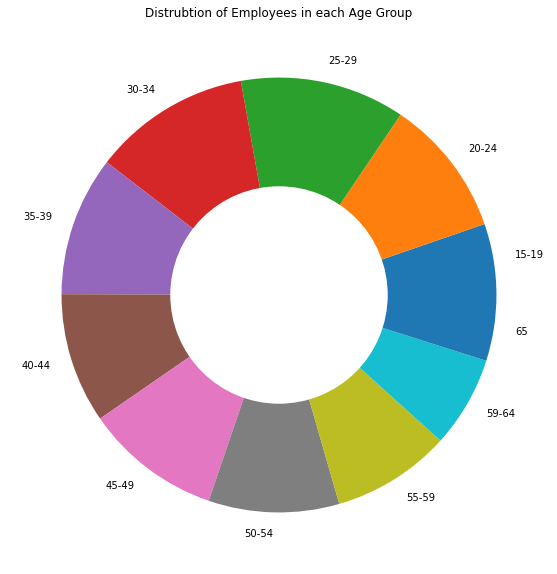

In [241]:
totalNZ = []
totalNZ = age_region.iloc[:, 17: 188: 17]
A = np.array(totalNZ)
tot=[0,0,0,0,0,0,0,0,0,0,0]
for i in range(35):
    tot[0] += int((totalNZ["NaN'"][1:36])[i+1])
for i in range(35):
    tot[1] += int((totalNZ['NaN.30'][1:36])[i+1])
for i in range(35):
    tot[2] += int((totalNZ['NaN.46'][1:36])[i+1])
for i in range(35):
    tot[3] += int((totalNZ['NaN.62'][1:36])[i+1])
for i in range(35):
    tot[4] += int((totalNZ['NaN.78'][1:36])[i+1])
for i in range(35):
    tot[5] += int((totalNZ['NaN.94'][1:36])[i+1])
for i in range(35):
    tot[6] += int((totalNZ['NaN.110'][1:36])[i+1])
for i in range(35):
    tot[7] += int((totalNZ['NaN.126'][1:36])[i+1])
for i in range(35):
    tot[8] += int((totalNZ['NaN.142'][1:36])[i+1])
for i in range(35):
    tot[9] += int((totalNZ['NaN.158'][1:36])[i+1])
for i in range(35):
    tot[10] += int((totalNZ['NaN.174'][1:36])[i+1])

plt.rcParams["figure.figsize"] = (10,10)
plt.title("Distrubtion of Employees in each Age Group")
plt.pie(tot, labels = agegroups)
centre_circle = plt.Circle((0,0), 0.5, fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [134]:
agegroups= ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "59-64", "65"]

In [240]:
locations = age_region.iloc[0]
location = []
for i in range(16):
    location.append(locations[i+1])

location

['Northland',
 'Auckland',
 'Waikato',
 'Bay of Plenty',
 'Gisborne',
 "Hawke's Bay",
 'Taranaki',
 'Manawatu-Whanganui',
 'Wellington',
 'Tasman',
 'Nelson',
 'Marlborough',
 'West Coast',
 'Canterbury',
 'Otago',
 'Southland']

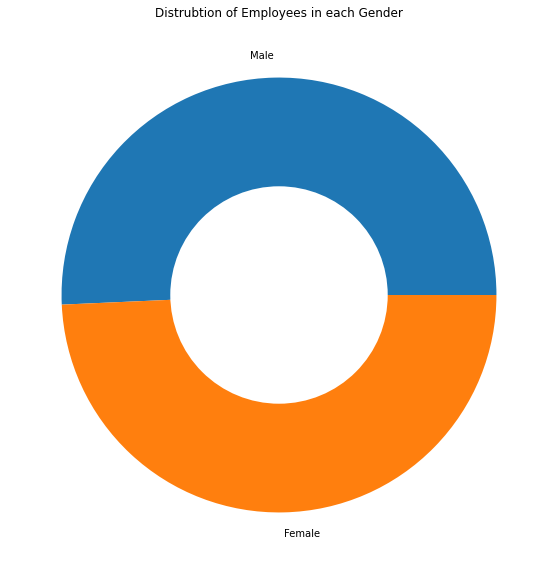

In [335]:
genders = ['Male', 'Female']
gen = [0, 0]

gends = [male, female]
holder = []
male = gender_age.iloc[:, 1: 12: 1]
female = gender_age.iloc[:, 12: 24: 1]
for i in range(2):
    pholder = gends[i]
    for k in range(len(gends[i].columns)):
        holder = pholder.iloc[:, k]
        for j in range(35):
            val = int(holder[j+1])
            gen[i]+=(val)
            

plt.rcParams["figure.figsize"] = (10,10)
plt.title("Distrubtion of Employees in each Gender")
plt.pie(gen, labels = genders)
centre_circle = plt.Circle((0,0), 0.5, fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [93]:
industry.shape

(36, 21)

In [190]:
#uneven number of months in each year
a = (industry.year.value_counts().sort_index())
c = ["2019", "2020", "2021", "2022"]
a

2019     8
2020    12
2021    12
2022     4
Name: year, dtype: int64

In [422]:
for i in range(19):
    print(cols[i+1])

Agriculture, Forestry and Fishing
Mining
Manufacturing
Electricity, Gas, Water and Waste Services
Construction
Wholesale Trade
Retail Trade
Accommodation and Food Services
Transport, Postal and Warehousing
Information Media and Telecommunications
Financial and Insurance Services
Rental, Hiring and Real Estate Services
Professional, Scientific and Technical Services
Administrative and Support Services
Public Administration and Safety
Education and Training
Health Care and Social Assistance
Arts and Recreation Services
Other Services


[6645409, 6705032, 6724696, 6709981, 6603079, 6595172, 6569579, 6583524, 6599411, 6652787, 6743156, 6813199]
684


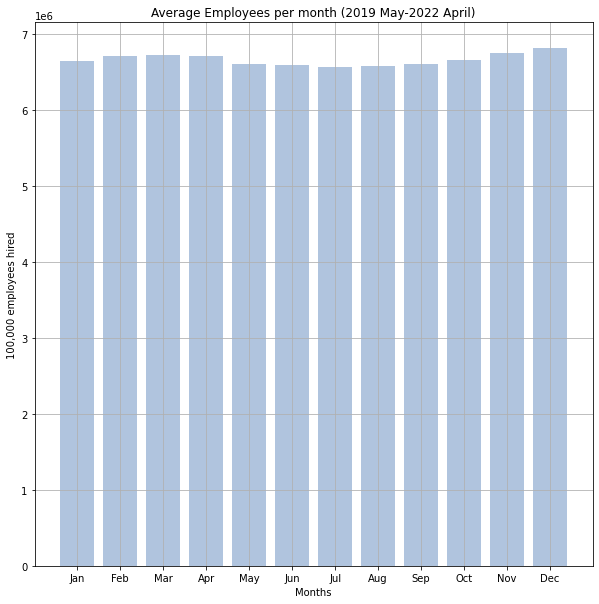

In [424]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_employment = [0,0,0,0,0,0,0,0,0,0,0,0]
holder = 0
a = (industry.month.value_counts().sort_index())
for i in range(19):
    for a in range(36):
        holder += 1
        if industry.iloc[a].month == 1:
            month_employment[0] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 2:
            month_employment[1] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 3:
            month_employment[2] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 4:
            month_employment[3] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 5:
            month_employment[4] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 6:
            month_employment[5] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 7:
            month_employment[6] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 8:
            month_employment[7] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 9:
            month_employment[8] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 10:
            month_employment[9] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 11:
            month_employment[10] += industry[cols[i+1]][a]
        elif industry.iloc[a].month == 12:
            month_employment[11] += industry[cols[i+1]][a]
plt.rcParams["figure.figsize"] = (10,10)
print(month_employment)
plt.grid()
plt.xlabel("Months")
plt.ylabel("100,000 employees hired")
#plt.ylims(3,8)
plt.title("Average Employees per month (2019 May-2022 April)")
plt.bar(months, month_employment, color = "lightsteelblue")
print(holder)

8
12
12


<BarContainer object of 4 artists>

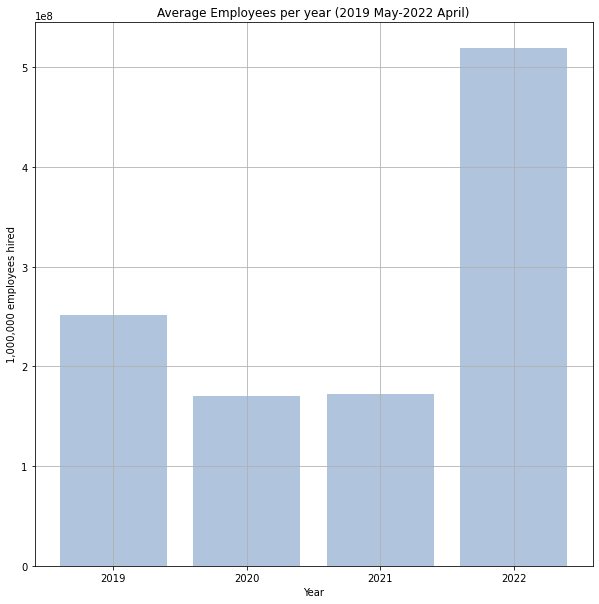

In [425]:
a = industry.year.value_counts().sort_index()
c = ["2019", "2020", "2021", "2022"]
yearly_mean = [0,0,0,0]
cols = industry.columns
for y in range(len(a)):
    yearly - 0
    if y == 0:
        yearvals = industry[0 : a.iloc[y]]
        for x in range(19):
            yearly += yearvals[cols[x+1]].sum()
        yearly_mean[y] = yearly/(a.iloc[y])
        print(a.iloc[y])
    elif y == 1:
        yearvals = industry[(a.iloc[0]) : (a.iloc[0]+ a.iloc[1])]
        for x in range(19):
            yearly += yearvals[cols[x+1]].sum()
        yearly_mean[y] = yearly/(a.iloc[y])
        print(a.iloc[y])
    elif y == 2:
        yearvals = industry[(a.iloc[0]+ a.iloc[1]) : (a.iloc[0]+ a.iloc[1] + a.iloc[2])]
        for x in range(19):
            yearly += yearvals[cols[x+1]].sum()
        yearly_mean[y] = yearly/(a.iloc[y])
        print(a.iloc[y])
    elif y == 3:
        yearvals = industry[(a.iloc[0]+ a.iloc[1] + a.iloc[2]) : (a.iloc[0] + a.iloc[1]+a.iloc[2]+a.iloc[3])]
        for x in range(19):
            yearly += yearvals[cols[x+1]].sum()
        yearly_mean[y] = yearly/(a.iloc[y])
        
            
plt.rcParams["figure.figsize"] = (10,10)
plt.grid()
plt.xlabel("Year")
plt.ylabel("1,000,000 employees hired")
plt.title("Average Employees per year (2019 May-2022 April)")
plt.bar(c, yearly_mean, color = "lightsteelblue")

In [391]:
#related industries
industry.corr()

,"Agriculture, Forestry and Fishing",Mining,Manufacturing,"Electricity, Gas, Water and Waste Services",Construction,Wholesale Trade,Retail Trade,Accommodation and Food Services,"Transport, Postal and Warehousing",Information Media and Telecommunications,Financial and Insurance Services,"Rental, Hiring and Real Estate Services","Professional, Scientific and Technical Services",Administrative and Support Services,Public Administration and Safety,Education and Training,Health Care and Social Assistance,Arts and Recreation Services,Other Services
"Agriculture, Forestry and Fishing",1.000000,-0.134022,0.999964,0.999987,0.999623,0.453258,0.774448,0.247698,-0.194967,-0.132532,0.230321,0.526427,0.302913,-0.270714,0.396337,-0.140127,0.324789,-0.160567,0.387808
Mining,-0.134022,1.000000,0.107123,-0.308402,-0.205885,0.358135,0.057925,0.167097,0.669501,0.364915,-0.024224,-0.005977,0.030555,0.185500,-0.404763,0.006805,-0.214117,0.246917,-0.150314
Manufacturing,0.999964,0.107123,1.000000,0.999945,0.999631,0.813076,0.693396,0.364134,0.215308,0.202094,0.224704,0.676199,0.439578,0.369061,0.110349,-0.254429,0.279892,-0.123204,0.333578
"Electricity, Gas, Water and Waste Services",0.999987,-0.308402,0.999945,1.000000,0.999644,0.500922,0.584049,-0.180180,-0.626268,-0.314616,0.875694,0.808270,0.883111,-0.137255,0.845285,0.075314,0.944049,-0.649384,0.928906
Construction,0.999623,-0.205885,0.999631,0.999644,1.000000,0.578068,0.585343,-0.097498,-0.544951,-0.294330,0.921814,0.845693,0.949239,-0.003192,0.807326,0.190454,0.981160,-0.612222,0.979267
Wholesale Trade,0.453258,0.358135,0.813076,0.500922,0.578068,1.000000,0.763525,0.386619,0.245218,0.135761,0.539195,0.834581,0.742991,0.383689,0.271379,0.025361,0.535512,-0.156182,0.594503
Retail Trade,0.774448,0.057925,0.693396,0.584049,0.585343,0.763525,1.000000,0.402248,-0.000829,-0.215327,0.542528,0.752099,0.642425,-0.019023,0.448753,0.065924,0.533930,-0.209809,0.624244
Accommodation and Food Services,0.247698,0.167097,0.364134,-0.180180,-0.097498,0.386619,0.402248,1.000000,0.388081,0.102551,-0.226417,0.285824,-0.026613,0.133446,-0.225876,0.228459,-0.037221,0.689130,0.026620
"Transport, Postal and Warehousing",-0.194967,0.669501,0.215308,-0.626268,-0.544951,0.245218,-0.000829,0.388081,1.000000,0.332347,-0.432362,-0.225791,-0.311893,0.482499,-0.664420,-0.069941,-0.593463,0.452176,-0.518206
Information Media and Telecommunications,-0.132532,0.364915,0.202094,-0.314616,-0.294330,0.135761,-0.215327,0.102551,0.332347,1.000000,-0.285818,-0.087154,-0.197118,0.133716,-0.448456,-0.238765,-0.273726,0.274350,-0.277352


In [32]:
b = 0
a = [1, 2, 3, 4, 5, 6, 7]
for x in range(len(a)):
    b += a[x]
print(b)

28


In [33]:
job = industry.columns

print(job)

Index(['Industry by variable (Monthly)', 'Agriculture, Forestry and Fishing',
       'Mining', 'Manufacturing', 'Electricity, Gas, Water and Waste Services',
       'Construction', 'Wholesale Trade', 'Retail Trade',
       'Accommodation and Food Services', 'Transport, Postal and Warehousing',
       'Information Media and Telecommunications',
       'Financial and Insurance Services',
       'Rental, Hiring and Real Estate Services',
       'Professional, Scientific and Technical Services',
       'Administrative and Support Services',
       'Public Administration and Safety', 'Education and Training',
       'Health Care and Social Assistance', 'Arts and Recreation Services',
       'Other Services'],
      dtype='object')


In [38]:
sns.set_theme(style="whitegrid", palette="pastel")

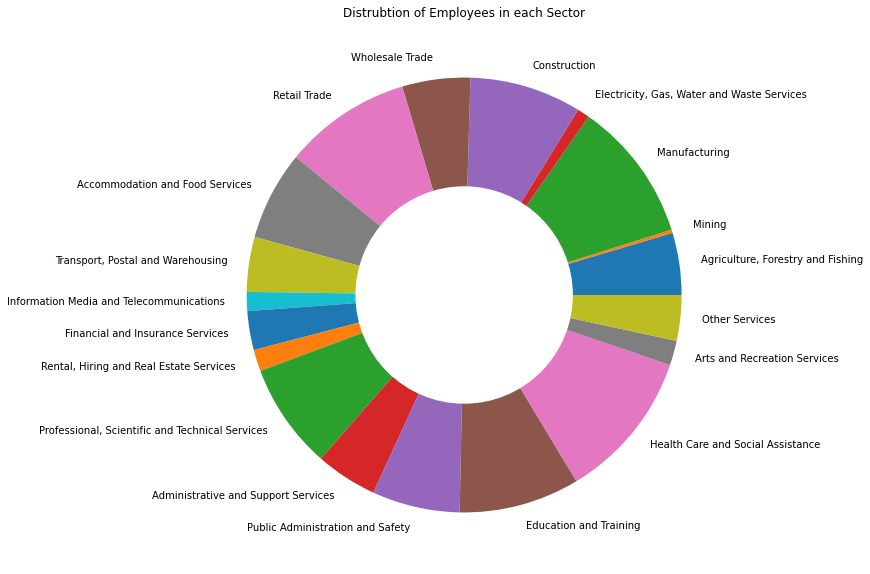

In [427]:
plt.title("Distrubtion of Employees in each Sector")
plt.pie(tot, labels = indust)
centre_circle = plt.Circle((0,0), 0.5, fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [43]:
industry.columns

Index(['Industry by variable (Monthly)', 'Agriculture, Forestry and Fishing',
       'Mining', 'Manufacturing', 'Electricity, Gas, Water and Waste Services',
       'Construction', 'Wholesale Trade', 'Retail Trade',
       'Accommodation and Food Services', 'Transport, Postal and Warehousing',
       'Information Media and Telecommunications',
       'Financial and Insurance Services',
       'Rental, Hiring and Real Estate Services',
       'Professional, Scientific and Technical Services',
       'Administrative and Support Services',
       'Public Administration and Safety', 'Education and Training',
       'Health Care and Social Assistance', 'Arts and Recreation Services',
       'Other Services'],
      dtype='object')

Text(0.5, 1.0, 'Administrative and Support Services')

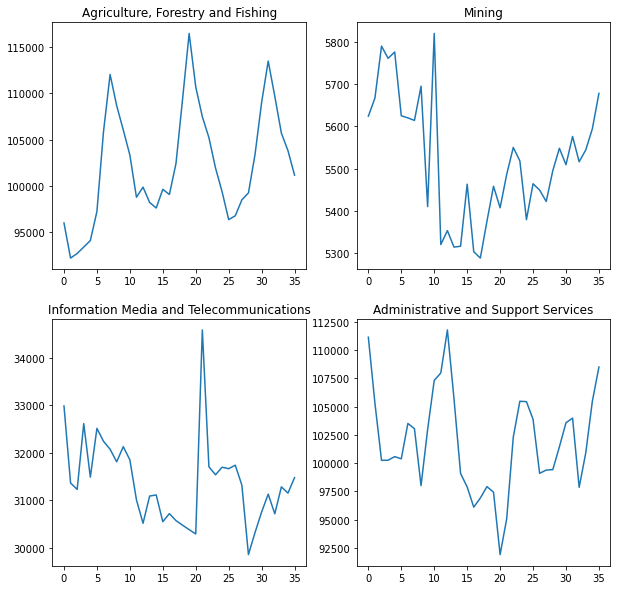

In [105]:
figure, axis = plt.subplots(2, 2)
axis[0,0].plot(industry['Agriculture, Forestry and Fishing'])
axis[0, 0].set_title('Agriculture, Forestry and Fishing')
axis[0, 1].plot(industry['Mining'])
axis[0, 1].set_title('Mining')
axis[1,0].plot(industry["Information Media and Telecommunications"])
axis[1,0].set_title("Information Media and Telecommunications")
axis[1, 1].plot(industry['Administrative and Support Services'])
axis[1, 1].set_title('Administrative and Support Services')


Text(0.5, 1.0, 'Transport, Postal and Warehousing')

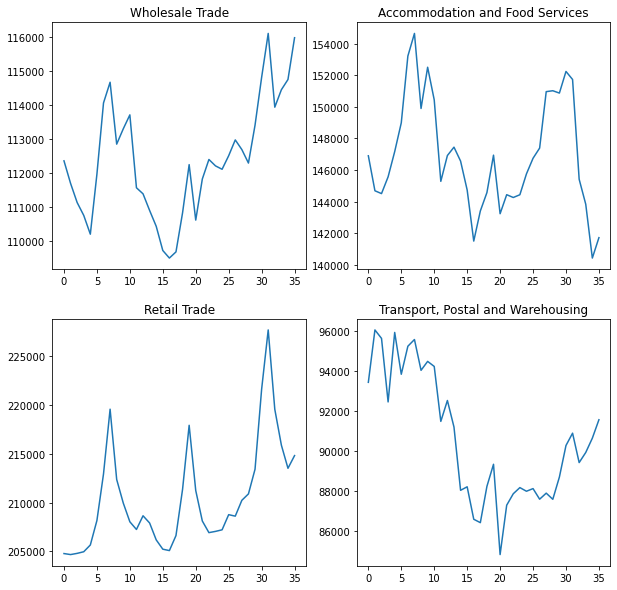

In [108]:
figure, axis = plt.subplots(2, 2)
axis[0,0].plot(industry["Wholesale Trade"])
axis[0,0].set_title("Wholesale Trade")
axis[1, 0].plot(industry['Retail Trade'])
axis[1, 0].set_title('Retail Trade')
axis[0, 1].plot(industry['Accommodation and Food Services'])
axis[0, 1].set_title('Accommodation and Food Services')
axis[1, 1].plot(industry['Transport, Postal and Warehousing'])
axis[1, 1].set_title('Transport, Postal and Warehousing')

Text(0.5, 1.0, 'Professional, Scientific and Technical Services')

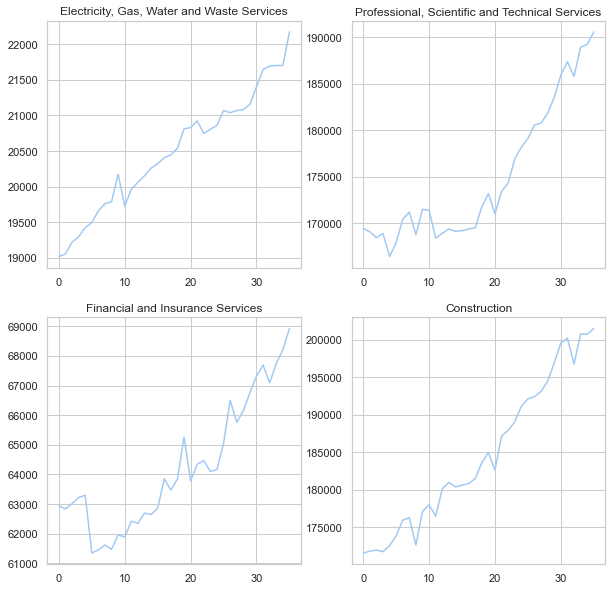

In [76]:
figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(industry['Electricity, Gas, Water and Waste Services'])
axis[0, 0].set_title('Electricity, Gas, Water and Waste Services')
axis[1, 1].plot(industry['Construction'])
axis[1, 1].set_title('Construction')
axis[1, 0].plot(industry['Financial and Insurance Services'])
axis[1, 0].set_title('Financial and Insurance Services')
axis[0,1].plot(industry['Professional, Scientific and Technical Services'])
axis[0, 1].set_title('Professional, Scientific and Technical Services')

Text(0.5, 1.0, 'Arts and Recreation Services')

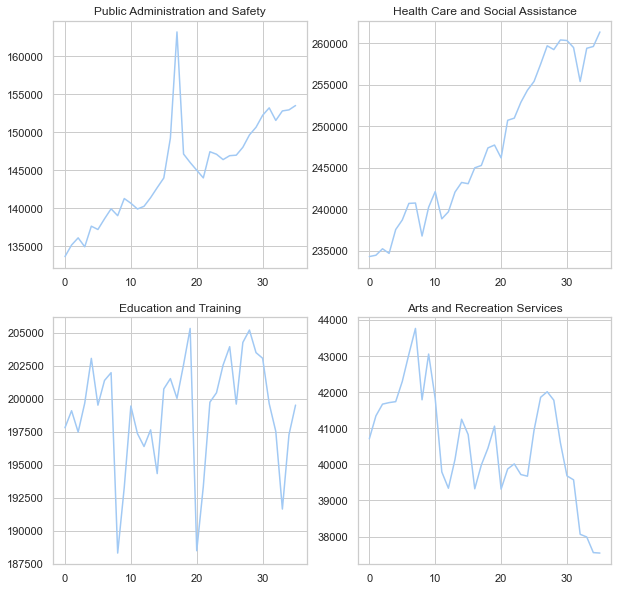

In [77]:
figure, axis = plt.subplots(2, 2)
axis[0,0].plot(industry['Public Administration and Safety'])
axis[0,0].set_title('Public Administration and Safety')
axis[1, 0].plot(industry['Education and Training'])
axis[1, 0].set_title('Education and Training')
axis[0, 1].plot(industry['Health Care and Social Assistance'])
axis[0, 1].set_title('Health Care and Social Assistance')
axis[1, 1].plot(industry['Arts and Recreation Services'])
axis[1, 1].set_title('Arts and Recreation Services')

Text(0.5, 1.0, 'Other Services')

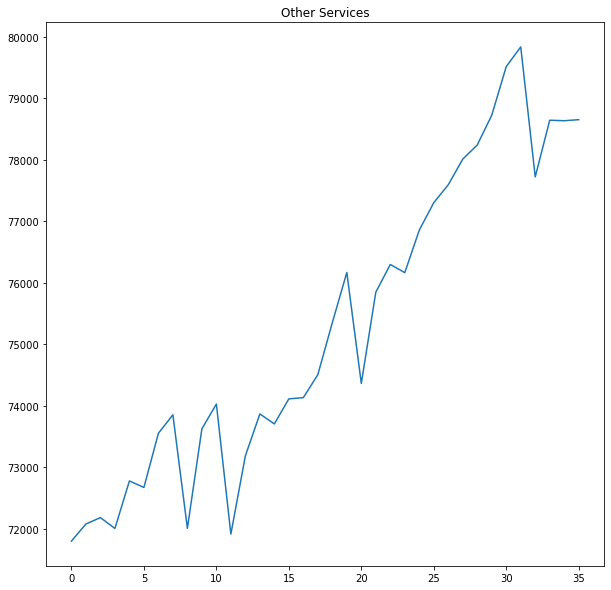

In [325]:
plt.plot(industry['Other Services'])
plt.title("Other Services")

In [ ]:
industry["Agriculture, Forestry and Fishing"]

In [231]:
industry

,Date,"Agriculture, Forestry and Fishing",Mining,Manufacturing,"Electricity, Gas, Water and Waste Services",Construction,Wholesale Trade,Retail Trade,Accommodation and Food Services,"Transport, Postal and Warehousing",Information Media and Telecommunications,Financial and Insurance Services,"Rental, Hiring and Real Estate Services","Professional, Scientific and Technical Services",Administrative and Support Services,Public Administration and Safety,Education and Training,Health Care and Social Assistance,Arts and Recreation Services,Other Services
0,2019-05-01,96007,5624,232878,19016,171566,112355,204776,146901,93421,32985,62940,34062,169464,111136,133655,197811,234321,40709,71800
1,2019-06-01,92219,5667,227383,19053,171815,111690,204673,144688,96036,31368,62836,33968,169097,105300,135172,199098,234482,41343,72078
2,2019-07-01,92710,5790,225474,19217,171966,111124,204796,144510,95614,31232,63008,34127,168465,100245,136117,197483,235259,41667,72182
3,2019-08-01,93407,5761,227200,19296,171748,110744,204963,145570,92442,32614,63218,33603,168916,100255,134942,199676,234704,41709,72005
4,2019-09-01,94106,5776,226052,19423,172541,110190,205656,147165,95911,31490,63295,33981,166432,100575,137651,203063,237575,41736,72778
5,2019-10-01,97250,5625,230193,19492,173868,111962,208170,148988,93824,32515,61343,34877,167921,100381,137217,199519,238729,42295,72672
6,2019-11-01,105864,5620,235073,19659,175956,114064,212947,153210,95223,32243,61453,35647,170455,103510,138621,201389,240725,43048,73553
7,2019-12-01,112040,5614,238109,19760,176266,114675,219592,154641,95558,32076,61617,36188,171211,103044,139939,201978,240770,43763,73853
8,2020-01-01,108667,5695,234708,19785,172636,112848,212380,149894,94021,31812,61470,35494,168783,98014,139033,188320,236795,41787,72007
9,2020-02-01,106052,5410,237359,20175,177120,113300,209960,152502,94466,32130,61955,35892,171509,102987,141290,193304,240264,43054,73624


In [164]:
#for the legend on the graph
age_region.rename(columns={age_region.columns[17]: "TotalNZ_15to19",
                          age_region.columns[34]: "TotalNZ_20to24",
                          age_region.columns[51]: "TotalNZ_25to29",
                          age_region.columns[68]: "TotalNZ_30to34",
                          age_region.columns[85]: "TotalNZ_35to39",
                          age_region.columns[102]: "TotalNZ_40to44",
                          age_region.columns[119]: "TotalNZ_45to49",
                          age_region.columns[136]: "TotalNZ_50to54",
                          age_region.columns[153]: "TotalNZ_55to59",
                          age_region.columns[170]: "TotalNZ_60to64",
                          age_region.columns[187]: "TotalNZ_65plus",}, inplace = True)

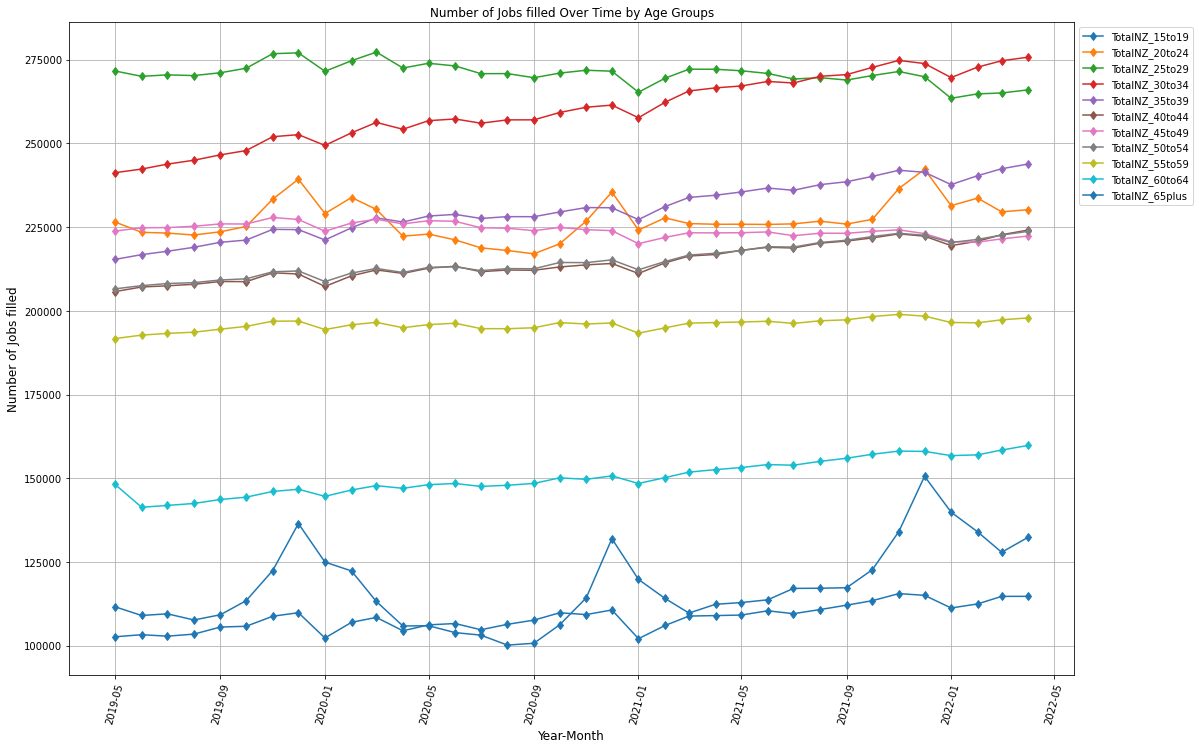

In [165]:
plt.figure(figsize = (18, 12))
plt.xticks(rotation = 75)

for i in age_region.iloc[:, [17, 34, 51, 68, 85, 102, 119, 136, 153, 170, 187]]:
    plt.plot(age_region['Date'], age_region[i], label = i, marker = 'd')

plt.title('Number of Jobs filled Over Time by Age Groups')
plt.xlabel("Year-Month", fontsize = 12)
plt.ylabel("Number of Jobs filled", fontsize = 12)

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()

Text(0, 0.5, 'Number of Jobs filled')

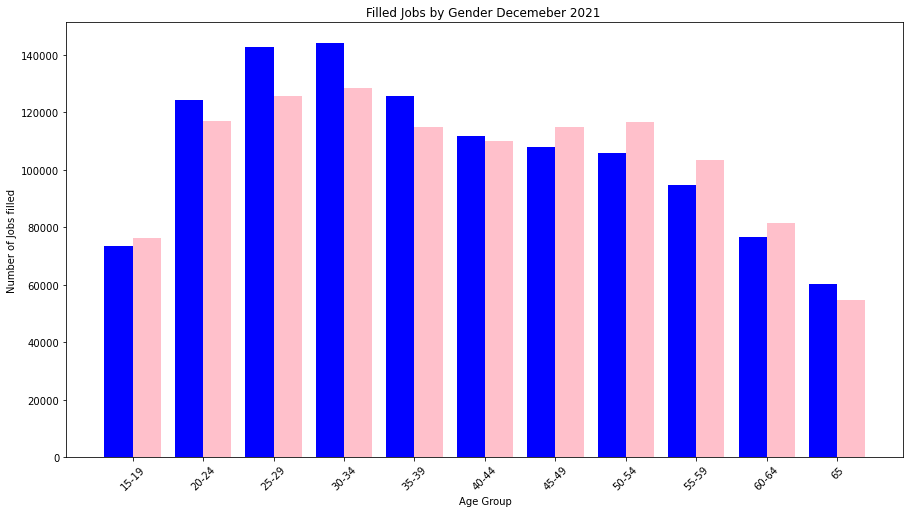

In [214]:
fig = plt.figure(figsize=(15, 8))

male_label = list(gender_age.columns[1:12])
female_label = list(gender_age.columns[12:])
mdates = list(gender_age[male_label].iloc[31])
fdates = list(gender_age[female_label].iloc[31])
width = 0.4
x = np.arange(len(male_label))

plt.bar(x-0.2, mdates, width, color = 'blue')
plt.bar(x+0.2, fdates, width, color = 'pink')
plt.xticks(x, male_label, rotation = 45)
plt.title("Filled Jobs by Gender Decemeber 2021 ")
plt.xlabel('Age Group', fontsize = 10)
plt.ylabel('Number of Jobs filled', fontsize = 10)